# Exploratory Data Analysis Notebook # 2

1. Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2. Import Data

In [18]:
planes = pd.read_csv('Datasets/planes.csv')
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


3. Explore Data

In [19]:
planes.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [20]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [21]:
planes.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [22]:
planes.shape

(10683, 11)

In [23]:
planes.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [24]:
planes.isna().sum() * 100 / len(planes)

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [25]:
planes.loc[planes["Total_Stops"].isna(),:]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [26]:
planes.loc[planes["Route"].isna(),:]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [27]:
planes.dropna(inplace=True)

In [28]:
planes.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [29]:
planes.columns 

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [30]:
# Replace any character or String
planes.columns = planes.columns.str.replace("_","")
planes.columns

Index(['Airline', 'DateofJourney', 'Source', 'Destination', 'Route', 'DepTime',
       'ArrivalTime', 'Duration', 'TotalStops', 'AdditionalInfo', 'Price'],
      dtype='object')

In [31]:
# For removing No-info data from Additional_Info column
airline_prices = planes.groupby("Airline")["Price"].median()
airline_prices

Airline
Air Asia                              5162.0
Air India                             9443.0
GoAir                                 5135.0
IndiGo                                5000.0
Jet Airways                          11467.0
Jet Airways Business                 54747.0
Multiple carriers                    10197.0
Multiple carriers Premium economy    11269.0
SpiceJet                              3873.0
Trujet                                4140.0
Vistara                               7980.0
Vistara Premium economy               9125.0
Name: Price, dtype: float64

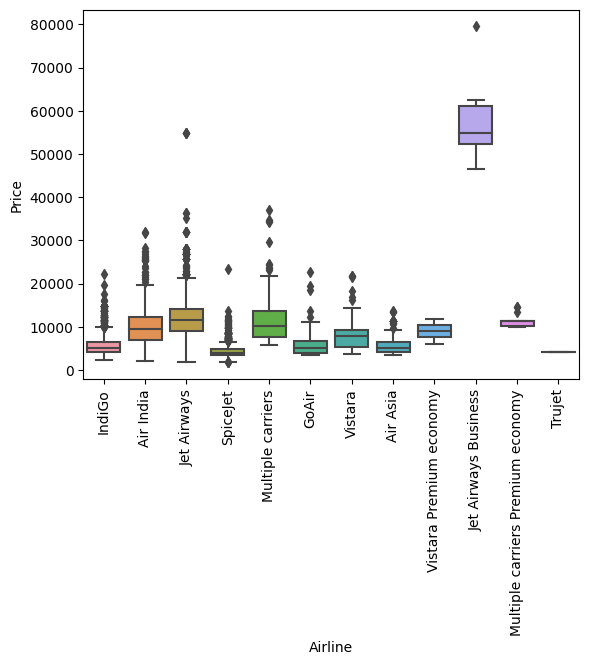

In [32]:
sns.boxplot(data=planes, x="Airline", y="Price")
plt.xticks(rotation=90)
plt.show()

In [33]:
planes.select_dtypes(exclude=["number"]).head()

,Airline,DateofJourney,Source,Destination,Route,DepTime,ArrivalTime,Duration,TotalStops,AdditionalInfo
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info


In [34]:
planes.select_dtypes(include=["number"]).head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


In [35]:
non_numeric = planes.select_dtypes("object")

for column in non_numeric.columns:
  print(f"Number of unique values in {column} column: ", non_numeric[column].nunique())

Number of unique values in Airline column:  12
Number of unique values in DateofJourney column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  128
Number of unique values in DepTime column:  222
Number of unique values in ArrivalTime column:  1343
Number of unique values in Duration column:  368
Number of unique values in TotalStops column:  5
Number of unique values in AdditionalInfo column:  10


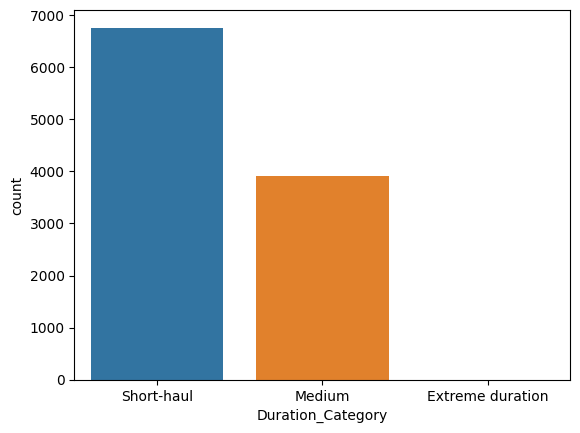

In [36]:
flight_categories = ["Short-haul", "Medium", "Long-haul"]
short_flights = "0h|1h|2h|3h|4h"
medium_flights = "5h|6h|7h|8h|9h"
long_flights = "10h|11h|12h|13h|14h|15h|16h"

# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, flight_categories, default="Extreme duration")

sns.countplot(data=planes, x="Duration_Category")
plt.show()